In [113]:
#Загружаем нужные библиотеки
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, metrics, tree 
from sklearn.model_selection import cross_val_score

import numpy as np

In [114]:
#Загружаем источник данных
digits_set = datasets.load_digits();
X = digits_set.data
Y = digits_set.target
"""
Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998
"""

"\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n"

In [115]:
"""
1.

Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. 
Эта величина и будет ответом в пункте 1.
"""
clf = tree.DecisionTreeClassifier(random_state=1)

In [116]:
#Кросс валидация

validationResult1 = cross_val_score(clf, X, Y, cv=10)
print "The answer in the first task is ", validationResult.mean()

The answer in the first task is  0.83086244395


In [78]:
#Бэггинг
"""
2.

Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier.
Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100.
Качество классификации новой модели - ответ в пункте 2. Обратите внимание, как соотносится качество работы 
композиции решающих деревьев с качеством работы одного решающего дерева.

class sklearn.ensemble.BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, 
bootstrap=True, bootstrap_features=False, 
oob_score=False, warm_start=False, n_jobs=1, random_state=None, verbose=0)
"""
#Импортируем беггинг из простарства имён ансамбль
from sklearn.ensemble import BaggingClassifier


baggingClf = BaggingClassifier(base_estimator=clf, n_estimators=100)
validationResult2 = cross_val_score(baggingClf, X, Y, cv=10)

In [79]:
print "The mean reasult for the bagging classifier is ", validationResult2.mean()

The mean reasult for the bagging classifier is  0.92329323338


In [125]:
"""
3.

Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, 
а на d√ случайных признаков.
Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков 
- часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. 
Но в общем случае ничто не мешает вам выбирать любое другое число 
случайных признаков.
"""
#Импортируем библиотеку math
import math

featuresCount = math.sqrt(X.shape[1])
baggingClf = BaggingClassifier(base_estimator=clf, n_estimators=100, bootstrap_features=True, max_features=int(featuresCount))
validationResult3 = cross_val_score(baggingClf, X, Y, cv=10)

In [126]:
print "The mean reasult for the bagging classifier with ", featuresCount, " features is ", validationResult3.mean()

The mean reasult for the bagging classifier with  8.0  features is  0.927587444797


In [107]:
"""
4.

Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. 
Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить 
его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать 
угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же d√ признаков. Качество полученного классификатора
на контрольной выборке и будет ответом в пункте 4.
"""
clf2 = tree.DecisionTreeClassifier(random_state=1, max_features=featuresCount)
baggingClf2 = BaggingClassifier(base_estimator=clf2, n_estimators=100)
validationResult4 = cross_val_score(baggingClf2, X, Y, cv=10)

In [108]:
print "The mean reasult for the bagging classifier with ", featuresCount, " features is ", validationResult4.mean()

The mean reasult for the bagging classifier with  0.125  features is  0.952215839115


In [84]:
"""
5.

Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается
случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest,
поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. 
Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, 
количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. 
Для наглядности лучше построить графики зависимости качества от значений параметров, 
но для сдачи задания это делать не обязательно.
"""
#Импортируем случайный лес из простарства имён ансамбль
from sklearn.ensemble import RandomForestClassifier

rfClassifier = RandomForestClassifier(n_estimators = 100, random_state = 1)



In [87]:
validationResult5 = cross_val_score(rfClassifier, X, Y, cv=10)

In [88]:
print "The mean reasult for the random forest classifier with is ", validationResult5.mean()

The mean reasult for the random forest classifier with is  0.957213001227


In [92]:
scores = []
counts = []
for count in np.linspace(1, 100, 10):
    tempClassifier = RandomForestClassifier(n_estimators = int(count), random_state = 1)
    tempValidationResult = cross_val_score(tempClassifier, X, Y, cv=10)
    counts.append(count)
    scores.append(tempValidationResult.mean())
#counts, scores, test_scores ;

Populating the interactive namespace from numpy and matplotlib


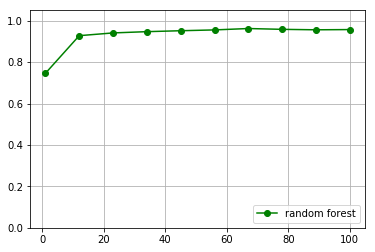

In [94]:
%pylab inline

pylab.grid(True)
pylab.plot(counts, scores, 'g-', marker='o', label='random forest')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')

In [95]:
"""
1) Случайный лес сильно переобучается с ростом количества деревьев

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно 
для высокого качества классификации, а затем качество существенно не меняется.

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, 
чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, 
тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), 
и тем лучше работает их композиция.

5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). 
Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может 
делать прогнозы более точно.

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, 
чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, 
чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, 
а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность 
в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, 
и при усреднении они компенсируют переобученность друг-друга).
"""

#Answers 2, 3, 5, 7

In [102]:
def write_answer(fileName, value):
    with open(fileName+".txt", "w") as fout:
        fout.write(str(value))


In [127]:
print validationResult1.mean()
print validationResult2.mean()
print validationResult3.mean()
print validationResult4.mean()

#write_answer("task1", validationResult1.mean())
#write_answer("task2", validationResult2.mean())
write_answer("task3", validationResult3.mean())
#write_answer("task4", validationResult4.mean())
write_answer("task5", "2 3 5 7")

0.83086244395
0.92329323338
0.927587444797
0.952215839115
